In [34]:
import tqdm
import math
import uproot
import numpy  as np
import matplotlib.pyplot as plt

In [43]:
# var_list = ['b1k', 'b2k','b1r','b2r','b1n','b2n','b2j','b2j','b1q','b2q',
#             'c_kk','c_rr','c_nn','c_Prk','c_Mrk','c_Pnr','c_Mnr','c_Pnk','c_Mnk',
#             'll_cHel','ll_cLab','llbar_delta_phi']

var_list = [
'b1k_mttbar',
'b2k_mttbar',
'b1r_mttbar',
'b2r_mttbar',
'b1n_mttbar',
'b2n_mttbar',
'b1j_mttbar',
'b2j_mttbar',
'b1q_mttbar',
'b2q_mttbar',
'c_kk_mttbar',
'c_rr_mttbar',
'c_nn_mttbar',
'c_Prk_mttbar',
'c_Mrk_mttbar',
'c_Pnr_mttbar',
'c_Mnr_mttbar',
'c_Pnk_mttbar',
'c_Mnk_mttbar',
'c_kj_mttbar',
'c_rq_mttbar',
'c_han_mttbar',
'c_tra_mttbar',
'c_sca_mttbar',
'c_Prj_mttbar',
'c_Mrj_mttbar',
'c_kjL_mttbar',
'c_rqL_mttbar',
'c_rkP_mttbar',
'c_rkM_mttbar',
'c_nrP_mttbar',
'c_nrM_mttbar',
'c_nkP_mttbar',
'c_nkM_mttbar',
'll_cHel_mttbar',
'll_cLab_mttbar',
'llbar_delta_phi_mttbar',
'llbar_delta_eta_mttbar',
]

In [44]:
fileptr_dict = {}
for var in var_list :
    fileptr_dict[var] = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/Bootstrap_op_root_files_2D_vars/" + str(var) + ".root")

In [45]:
fileptr_dict

{'b1k_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7d4167a0>,
 'b2k_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7cf68f10>,
 'b1r_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7c89f850>,
 'b2r_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7c3be1d0>,
 'b1n_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7bee8b50>,
 'b2n_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7b7eb490>,
 'b1j_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7b315e10>,
 'b2j_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7ae28790>,
 'b1q_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7a73f0d0>,
 'b2q_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7a25da50>,
 'c_kk_mttbar': <ReadOnlyDirectory '/' at 0x7f2d79d7c3d0>,
 'c_rr_mttbar': <ReadOnlyDirectory '/' at 0x7f2d79702d10>,
 'c_nn_mttbar': <ReadOnlyDirectory '/' at 0x7f2d7926d690>,
 'c_Prk_mttbar': <ReadOnlyDirectory '/' at 0x7f2d78df4160>,
 'c_Mrk_mttbar': <ReadOnlyDirectory '/' at 0x7f2d78706950>,
 'c_Pnr_mttbar': <ReadOnlyDirectory '/' at 0x7f2d782312d0>,
 'c_Mnr_mttbar': <ReadOnlyDirectory '/' at 0x7f2d77d43c10>,
 'c

In [46]:
nPE      = 100
nbinsvar = 24
nbinstot = nbinsvar * len(var_list)
r        = np.zeros((nbinstot,nbinstot))
cov      = np.zeros((nbinstot,nbinstot))

In [47]:
# Create an array with varname repeated 6 times and flatten it
# Some fun list comprehension stuff

n_times_over   = [[var] * nbinsvar for var in var_list]
flattened_vars = [item for sublist in n_times_over for item in sublist]

In [ ]:
from tqdm import tqdm

for xbin in tqdm(range(nbinstot)) :
    for ybin in range(nbinstot) :
        
        mu_x = 0
        mu_y = 0
        
        # Returns a string corresponding to varname
        xvar = flattened_vars[xbin]
        yvar = flattened_vars[ybin]
        
        for i in range(nPE) :
            X = fileptr_dict[xvar][xvar + '_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()
            Y = fileptr_dict[yvar][yvar + '_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()   
            
            # modulo nbinsvar for the var
            mu_x += X[xbin%nbinsvar]
            mu_y += Y[ybin%nbinsvar]
            
        mu_x /= nPE
        mu_y /= nPE
        
        sum_xy  = 0
        diff_x2 = 0
        diff_y2 = 0
        
        for i in range(nPE) :
            X = fileptr_dict[xvar][xvar +'_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()
            Y = fileptr_dict[yvar][yvar +'_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()   
            
            diff_x2 += (X[xbin%nbinsvar] - mu_x)**2
            diff_y2 += (Y[ybin%nbinsvar] - mu_y)**2
            
            sum_xy  += (X[xbin%nbinsvar] - mu_x) * (Y[ybin%nbinsvar] - mu_y)
            
        cov[xbin][ybin] = sum_xy / nPE
        
        # Correlation is covariance normalized by the 2 variances
        r[xbin][ybin]   = sum_xy / math.sqrt(diff_x2 * diff_y2)

 12%|█▏        | 108/912 [11:52<1:27:25,  6.52s/it]

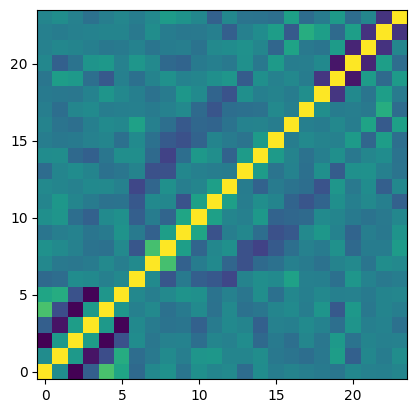

In [42]:
plt.imshow(r, interpolation='none', origin='lower')
plt.show()

In [138]:
import ROOT
opfileptr       = ROOT.TFile.Open("Bootstrap_2D_mttbar.root", "RECREATE")
ophistogram_r   = ROOT.TH2D("h_RhoBBCorrected_rebinnedA"    , "h_RhoBBCorrected_rebinnedA"    , nbinstot, 0, nbinstot, nbinstot, 0, nbinstot)
ophistogram_cov = ROOT.TH2D("h_TotalSystCovMatrix_rebinnedA", "h_TotalSystCovMatrix_rebinnedA", nbinstot, 0, nbinstot, nbinstot, 0, nbinstot)

In [139]:
for i in range(0, nbinstot-24) :
    for j in range(0, nbinstot-24) :
        ophistogram_r.SetBinContent(i+1, j+1, r[i][j])
        ophistogram_cov.SetBinContent(i+1, j+1, cov[i][j])

In [140]:
ophistogram_r.Write()
ophistogram_cov.Write()
opfileptr.Write()
opfileptr.Close()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f6e659c31c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f6e659c35e0>, text=[])

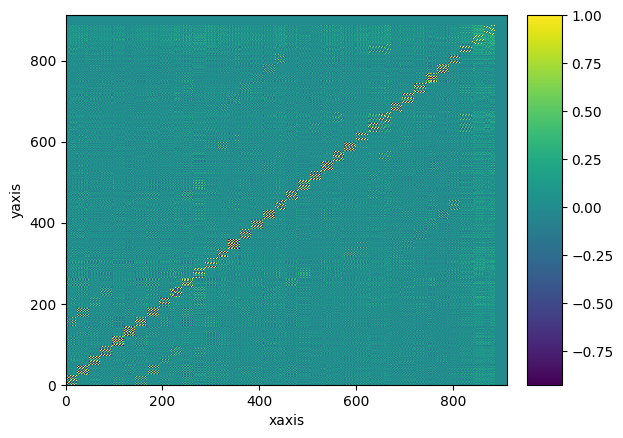

In [141]:
ipfileptr = uproot.open("Bootstrap_2D_mttbar.root")
ipfileptr["h_RhoBBCorrected_rebinnedA"].to_hist().plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f6e638c84c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f6e638c88e0>, text=[])

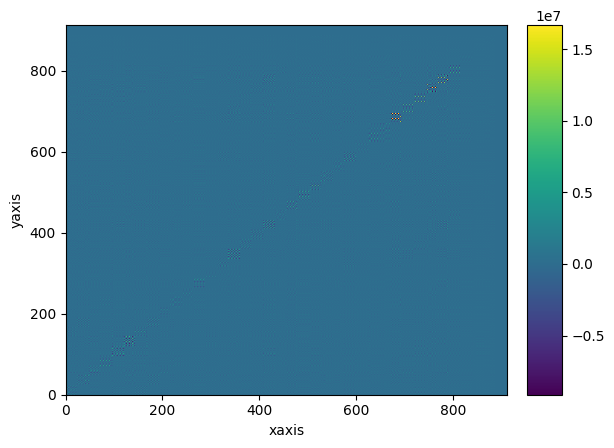

In [142]:
ipfileptr["h_TotalSystCovMatrix_rebinnedA"].to_hist().plot()

In [10]:
cov

array([[ 1843386.29009014,  -296377.20066157, -1228401.7208525 , ...,
          -14434.46791854,   197713.08538257,  -118098.31886405],
       [ -296377.20066157,   920030.19933722,   453729.35961501, ...,
          -46757.45191549,  -192238.15123732,  -138439.60536146],
       [-1228401.7208525 ,   453729.35961501,  1944671.99004035, ...,
           92317.3145235 ,   -34723.29506497,   -50004.27493439],
       ...,
       [  -14434.46791854,   -46757.45191549,    92317.3145235 , ...,
          353980.74923362,   -25119.68410293,  -242469.33280528],
       [  197713.08538257,  -192238.15123732,   -34723.29506497, ...,
          -25119.68410293,   659149.62488711,  -164234.10295141],
       [ -118098.31886405,  -138439.60536146,   -50004.27493439, ...,
         -242469.33280528,  -164234.10295141,  8363519.99740127]])

In [44]:
%timeit fileptr_dict[xvar][xvar + '_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()

14.4 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [46]:
%timeit fileptr_dict[xvar][xvar + '_pseudo' + str(i) + 'TUnfResult_rebinnedA'].to_numpy()[0]

53.8 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [56]:
%timeit test(100)

2.14 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%timeit test(1000)

3 s ± 305 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
(132*132*3) / 3600

14.52

In [69]:
def save_and_load(nPE, Xarr, Yarr) :

    for i in range(nPE) :
        X = fileptr_dict[xvar][xvar +'_pseudo' + str(i) + 'TUnfResult_rebinnedA'].values()
        Xarr.append(X)
        
    return Xarr, Yarr

In [70]:
Xarr = []
Yarr = []
%timeit save_and_load(100, Xarr, Yarr)

1.21 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [71]:
Xarr = []
Yarr = []
%timeit save_and_load(1000, Xarr, Yarr)

1.31 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
Xarr[2][2]

321798.6056675724

In [11]:
cov_from_file = uproot.open('/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/Allvars_2D_new/Systematics_AllVars.root')

In [12]:
[k for k in cov_from_file.keys() if 'TotalStat' in k]

['TotalStatCovMatrix_AllVar_rebinnedA;1',
 'TotalStatSystCovMatrix_AllVar_rebinnedA;1',
 'TotalStatCovMatrix_AllVarNorm_rebinnedA;1',
 'TotalStatSystCovMatrix_AllVarNorm_rebinnedA;1']

In [13]:
cov_from_file['TotalStatCovMatrix_AllVar_rebinnedA'].to_hist().values()

array([[ 2.20837843e+01, -4.12214628e+00, -1.37799425e+01, ...,
         1.32782245e-01,  1.32333869e-01,  2.35798959e-01],
       [-4.12214628e+00,  1.48560090e+01,  5.90915435e+00, ...,
         4.65858826e-02,  2.04449943e-01,  2.30615643e-01],
       [-1.37799425e+01,  5.90915435e+00,  2.04269342e+01, ...,
         4.69658252e-01,  1.18699839e-01,  9.89644798e-02],
       ...,
       [ 1.32782245e-01,  4.65858826e-02,  4.69658252e-01, ...,
         3.11779728e-01,  9.85014461e-02,  1.58945105e-02],
       [ 1.32333869e-01,  2.04449943e-01,  1.18699839e-01, ...,
         9.85014461e-02,  3.02893036e-01,  3.57184094e-02],
       [ 2.35798959e-01,  2.30615643e-01,  9.89644798e-02, ...,
         1.58945105e-02,  3.57184094e-02,  2.22760010e-01]])

In [17]:
import ROOT

In [18]:
def getBinWidth(varname, binnumber) :
    binDirName  = "/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/binning/"
    binFileName = varname + "_binning_rebinnedB.xml"
    
    parser = ROOT.TDOMParser()
    parser.ParseFile(binDirName + binFileName)

    XMLdocument      = parser.GetXMLDocument();
    generatorBinning = ROOT.TUnfoldBinningXML.ImportXML(XMLdocument,"generator_rebinnedB");
    binning          = generatorBinning.FindNode("ttbargen_rebinnedB");
    
    return binning.GetBinSize(binnumber)

In [19]:
getBinWidth("b1k_mttbar", 12)

50.0001

In [20]:
scaled_cov = np.zeros((912,912))

In [21]:
for i in range(912) :
    for j in range(912) :
        xvar = flattened_vars[i]
        yvar = flattened_vars[j]
        
        xbinwidth = getBinWidth(xvar, (i%24))
        ybinwidth = getBinWidth(yvar, (j%24))
        
        scaled_cov[i][j] = (cov[i][j] / (xbinwidth * ybinwidth))

/tmp/ipykernel_63561/3694275153.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  scaled_cov[i][j] = (cov[i][j] / (xbinwidth * ybinwidth))


In [186]:
scaled_cov

911

In [176]:
import os

os.path.exists(binDirName + yvar + "_binning_rebinnedB.xml")

False

In [177]:
binDirName

'/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/binning/'